# TNSI - Séquence N°6 - Structures arborescentes
# TP N°2 - Algorithmes sur les arbres binaires

<div class="alert alert-warning" role="alert">  
    
**Objectifs :**  Mettre en oeuvre les algorithmes vus en cours sur les arbres binaires
</div>

Reprenons les classe `Noeud` et `ArbreBin` vues dans le TP N°1 sur l'implémentation en POO des arbres binaires.
- `Noeud` permettant de décrire la structure d'un noeud dans un arbre binaire
- `Arbrebin` qui est l'arbre proprement dit. Il se caractérise par
    - sa racine qui est un Noeud
    - des méthodes pour peupler cet arbre et l'afficher sous forme graphique
    - une méthode pour convertir un arbre saisie avec des listes Python en objet.
    - des méthodes que vous allez construire pour mettre le cours en pratique

In [4]:
from graphviz import Digraph

In [5]:
class Noeud():
    # la méthode __repr__ définit ce qui sera affiché
    # lorsqu'on tapera l'objet dans Jupyter ou un terminal
    # Ici, on affiche juste la valeur du noeud
    
    def __repr__(self):
        return str(self.valeur)
    
    def __init__(self,valeur):
        self.valeur = valeur
        self.gauche = None
        self.droit = None
    
    def cree_fils_gauche(self,sous_arbre):
        self.gauche = Noeud(sous_arbre)
        return self.gauche

    def cree_fils_droit(self,sous_arbre):
        self.droit = Noeud(sous_arbre)
        return self.droit
    
    def est_feuille(self):
        return self.gauche == None and self.droit == None

In [12]:
class ArbreBin:
    """Représente un objet arbre binaire
    - Propriétés : 
        * racine : objet de type Noeud désignant la racine de l'arbre
    - Méthodes :
        * show() : représentation graphique de l'arbre à l'aide de graphviz
    """
    
    def __init__(self, racine):
        self.racine = racine
    
    def show(self):
        """Renvoie un objet graphviz pour la visualisation graphique de l'arbre"""
        def representation(dot, noeud, aretes):
            # Ajoute la représentation du noeud à la représentation dot de l'arbre
            if noeud is not None:
                dot.node(str(id(noeud)), str(noeud.valeur))
                # Appel récursif de la fonction representation
                if noeud.gauche is not None:
                    representation(dot, noeud.gauche, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.gauche))))
                if noeud.droit is not None:
                    representation(dot, noeud.droit, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.droit))))
                    
        dot = Digraph(comment="Arbre binaire", format='svg')
        aretes = []
        representation(dot, self.racine, aretes)
        dot.edges(aretes)
        return dot
    
    def importer(self, tableau):
        """Fonction qui importe un arbre depuis un tableau
        ["Noeud", [S_A_G], [S_A_D]] et où [] désigne un arbre vide"""
        def convertir(tableau):
            # Cas particuliers
            if tableau == []:
                return None
            elif len(tableau) == 1:
                return Noeud(tableau[0])

            else:
                nd = Noeud(tableau[0])
                nd.gauche = convertir(tableau[1])
                if len(tableau) >= 3:
                    nd.droit  = convertir(tableau[2])
                else:
                    nd.droit = None
            return nd
        
        self.racine = convertir(tableau)

Pour illustrer ce TP, nous allons considérer l'arbre binaire suivant :

In [13]:
# On crée la structure d'arbre à l'aide d'un tableau  ["Noeud", [S_A_G], [S_A_D]]
arbre_liste = ["A",
                ["B", ["C",[],["E"]], 
                      ["D"]],
                ["F", ["G", ["I"]], 
                      ["H",["J", ["K"]]] ],
              ]

In [14]:
# On crée une instance vide de notre arbre
arbre = ArbreBin(None)
# On importe le tableau ci-dessus
arbre.importer(arbre_liste)

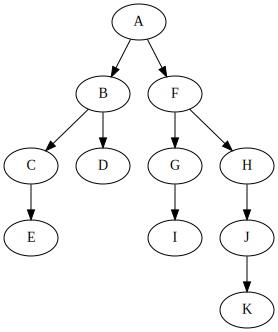

In [17]:
# On visualise l'arbre avec Graphviz
arbre.show()

### 1. Taille et hauteur d'un arbre binaire

<div class="alert alert-info">
    
<strong class='fa fa-cogs' style="color: darkorange"> Exercice 1 </strong>
    
On souhaite ajouter une première méthode `taille` à la classe `ArbreBin` afin de terminer la taille d'un arbre binaire.
    
Pour éviter la multiplication des méthodes, nous créons une **fonction locale** `taille_arbre` qui n'est visible que dans la méthode `taille`. C'est cette fonction qui implémente en réalité l'algorithme, la méthode n'étant là que pour invoquer la fonction `taille_arbre` sur la racine de l'arbre.
    
1. Compléter le code de la fonction `taille_arbre` ci-dessous.
2. Proposer une exécution de cette méthode pour l'arbre donné ci-dessus.
</div>

In [ ]:
class ArbreBin:
    """Représente un objet arbre binaire
    - Propriétés : 
        * racine : objet de type Noeud désignant la racine de l'arbre
    - Méthodes :
        * show() : représentation graphique de l'arbre à l'aide de graphviz
    """
    
    def __init__(self, racine):
        self.racine = racine
    
    def show(self):
        """Renvoie un objet graphviz pour la visualisation graphique de l'arbre"""
        def representation(dot, noeud, aretes):
            # Ajoute la représentation du noeud à la représentation dot de l'arbre
            if noeud is not None:
                dot.node(str(id(noeud)), str(noeud.valeur))
                # Appel récursif de la fonction representation
                if noeud.gauche is not None:
                    representation(dot, noeud.gauche, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.gauche))))
                if noeud.droit is not None:
                    representation(dot, noeud.droit, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.droit))))
                    
        dot = Digraph(comment="Arbre binaire", format='svg')
        aretes = []
        representation(dot, self.racine, aretes)
        dot.edges(aretes)
        return dot
    
    def importer(self, tableau):
        """Fonction qui importe un arbre depuis un tableau
        ["Noeud", [S_A_G], [S_A_D]] et où [] désigne un arbre vide"""
        def convertir(tableau):
            # Cas particuliers
            if tableau == []:
                return None
            elif len(tableau) == 1:
                return Noeud(tableau[0])

            else:
                nd = Noeud(tableau[0])
                nd.gauche = convertir(tableau[1])
                if len(tableau) >= 3:
                    nd.droit  = convertir(tableau[2])
                else:
                    nd.droit = None
            return nd
        
        self.racine = convertir(tableau)
        
     def taille(self):
        """Renvoie la taille de l'arbre"""
        def taille_arbre(nd):
            """
            nd : objet de la classe Noeud
            return : taille de l'arbre dont le noeud racine est nd.
            """
            # condition d'arrêt
            if nd is None:
                #TODO
            # Appel récursif
            return #TODO
        
        return #TODO
    
    def hauteur(self):
        """Renvoie la hauteur de l'arbre"""
        def hauteur_arbre(nd):
            # YOUR CODE HERE
            raise NotImplementedError()
        
        # Return à préciser

In [ ]:
# Exécution sur l'arbre donné en exemple.


<div class="alert alert-info">
    
<strong class='fa fa-cogs' style="color: darkorange"> Exercice 2 </strong>
    
On souhaite ajouter la méthode `hauteur` à la classe `ArbreBin` afin de terminer la hauteur d'un arbre binaire.
    
Compléter le code de la méthode `hauteur` dans la cellule précédente où est codée la classe `ArbreBin`.
</div>

In [20]:
# Exécuter ci-dessous la méthode `hauteur` sur l'arbre donné en exemple 


### 2. Parcours en profondeur

Voici la méthode permettant le parcours en profondeur préfixe.

Vous ferez attention de choisir les mêmes noms de méthodes que dans la cellule de test pour passer ces derniers avec succès.
```python
    def parcours_prefixe(self):
        """Renvoie la liste des noeuds dans un parcours Prefixe"""
        def prefixe(noeud):
            # Condition d'arrêt
            if noeud is None:
                return []
            # Appel récursif et renvoi réponse
            # La valeur est insérée AVANT les appels
            return [noeud.valeur] + prefixe(noeud.gauche) + prefixe(noeud.droit)
    
        return prefixe(self.racine)
 ```

<div class="alert alert-info">
    
<strong class='fa fa-cogs' style="color: darkorange"> Exercice 3 </strong>
    
1. Ajoutez-la à la classe `ArbreBin`.
2. Vérifiez son bon fonctionnement.
3. Implémentez de même les parcours postfixe et infixe.
4. Validez votre travail grâce à la cellule de tests. 
</div>

In [24]:
class ArbreBin:
    """Représente un objet arbre binaire
    - Propriétés : 
        * racine : objet de type Noeud désignant la racine de l'arbre
    - Méthodes :
        * show() : représentation graphique de l'arbre à l'aide de graphviz
    """
    
    def __init__(self, racine):
        self.racine = racine
    
    def show(self):
        """Renvoie un objet graphviz pour la visualisation graphique de l'arbre"""
        def representation(dot, noeud, aretes):
            # Ajoute la représentation du noeud à la représentation dot de l'arbre
            if noeud is not None:
                dot.node(str(id(noeud)), str(noeud.valeur))
                # Appel récursif de la fonction representation
                if noeud.gauche is not None:
                    representation(dot, noeud.gauche, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.gauche))))
                if noeud.droit is not None:
                    representation(dot, noeud.droit, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.droit))))
                    
        dot = Digraph(comment="Arbre binaire", format='svg')
        aretes = []
        representation(dot, self.racine, aretes)
        dot.edges(aretes)
        return dot
    
    def importer(self, tableau):
        """Fonction qui importe un arbre depuis un tableau
        ["Noeud", [S_A_G], [S_A_D]] et où [] désigne un arbre vide"""
        def convertir(tableau):
            # Cas particuliers
            if tableau == []:
                return None
            elif len(tableau) == 1:
                return Noeud(tableau[0])

            else:
                nd = Noeud(tableau[0])
                nd.gauche = convertir(tableau[1])
                if len(tableau) >= 3:
                    nd.droit  = convertir(tableau[2])
                else:
                    nd.droit = None
            return nd
        
        self.racine = convertir(tableau)
        
    # TODO !
    

In [ ]:
# Cellule de tests
arbre = ArbreBin(None)
arbre.importer(arbre_liste)

assert arbre.parcours_prefixe() == ['A', 'B', 'C', 'E', 'D', 'F', 'G', 'I', 'H', 'J', 'K']
assert arbre.parcours_suffixe() == ['E', 'C', 'D', 'B', 'I', 'G', 'K', 'J', 'H', 'F', 'A']
assert arbre.parcours_infixe() == ['C', 'E', 'B', 'D', 'A', 'I', 'G', 'F', 'K', 'J', 'H']

### 3. Parcours en largeur


<div class="alert alert-info">
    
<strong class='fa fa-cogs' style="color: darkorange"> Exercice 4 </strong>
    
Pour finir, ajoutez à la classe `ArbreBin` la méthode `parcours_largeur()`

On rappelle qu'en Python, pour implémenter une file, on utilise :
- `f.append(elt)` permet d'enfiler `elt` dans la file ;
- `f.pop(0)` permet de défiler une valeur de la file.
</div>

In [27]:
class ArbreBin:
    """Représente un objet arbre binaire
    - Propriétés : 
        * racine : objet de type Noeud désignant la racine de l'arbre
    - Méthodes :
        * show() : représentation graphique de l'arbre à l'aide de graphviz
    """
    
    def __init__(self, racine):
        self.racine = racine
    
    def show(self):
        """Renvoie un objet graphviz pour la visualisation graphique de l'arbre"""
        def representation(dot, noeud, aretes):
            # Ajoute la représentation du noeud à la représentation dot de l'arbre
            if noeud is not None:
                dot.node(str(id(noeud)), str(noeud.valeur))
                # Appel récursif de la fonction representation
                if noeud.gauche is not None:
                    representation(dot, noeud.gauche, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.gauche))))
                if noeud.droit is not None:
                    representation(dot, noeud.droit, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.droit))))
                    
        dot = Digraph(comment="Arbre binaire", format='svg')
        aretes = []
        representation(dot, self.racine, aretes)
        dot.edges(aretes)
        return dot
    
    def importer(self, tableau):
        """Fonction qui importe un arbre depuis un tableau
        ["Noeud", [S_A_G], [S_A_D]] et où [] désigne un arbre vide"""
        def convertir(tableau):
            # Cas particuliers
            if tableau == []:
                return None
            elif len(tableau) == 1:
                return Noeud(tableau[0])

            else:
                nd = Noeud(tableau[0])
                nd.gauche = convertir(tableau[1])
                if len(tableau) >= 3:
                    nd.droit  = convertir(tableau[2])
                else:
                    nd.droit = None
            return nd
        
        self.racine = convertir(tableau)
        
    # TODO !
    

In [ ]:
# Cellule de tests
arbre = ArbreBin(None)
arbre.importer(arbre_liste)

assert arbre.parcours_largeur() == ['A', 'B', 'F', 'C', 'D', 'G', 'H', 'E', 'I', 'J', 'K']